In [62]:
!pip install scikeras --quiet
!pip install keras-tuner --quiet
!pip install tensorflow --quiet

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from scikeras.wrappers import KerasRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from tensorflow import keras
from kerastuner import HyperModel, RandomSearch, GridSearch
# Import necessary libraries
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [64]:
# Google Drive import

# from google.colab import drive
# drive.mount('/content/drive')

# import pandas as pd

# Define the correct file path
# file_path = '/content/drive/MyDrive/DS/Colab/exam/cleaned_data.csv'

# Read the CSV file from the correct path
# new_data = pd.read_csv(file_path)

# Drop the unnecessary column
# new_data.drop(columns=['Unnamed: 0'], inplace=True)


# Define the correct file path
#file_path = '/content/drive/MyDrive/DS/Colab/exam/target_data.csv'

# Read the CSV file from the correct path
#target_variable = pd.read_csv(file_path)

# Drop the unnecessary column
#target_variable.drop(columns=['Unnamed: 0'], inplace=True)

In [65]:
new_data = pd.read_csv('cleaned_data.csv')
new_data.drop(columns=['Unnamed: 0'], inplace=True)

In [66]:
target_variable = pd.read_csv('target_data.csv')
target_variable.drop(columns=['Unnamed: 0'], inplace=True)

In [67]:
y = target_variable
X = new_data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)


model = LinearRegression()

model.fit(X_train_poly, y_train)

y_pred_poly = model.predict(X_test_poly)

r_squared_poly = r2_score(y_test, y_pred_poly)
print("R-squared with polynomial features:", r_squared_poly)

R-squared with polynomial features: 0.914542968276584


In [68]:
mae_poly = mean_absolute_error(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)

n = len(y_test)
p = X_test_poly.shape[1] - 1
adj_r_squared_poly = 1 - (1 - r_squared_poly) * (n - 1) / (n - p - 1)

print("Evaluation Metrics for Polynomial Regression Model:")
print("----------------------------------------------------")
print(f"R-squared: {r_squared_poly:.4f}")
print(f"Mean Absolute Error (MAE): {mae_poly:.4f}")
print(f"Mean Squared Error (MSE): {mse_poly:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_poly:.4f}")
print(f"Adjusted R-squared: {adj_r_squared_poly:.4f}")


Evaluation Metrics for Polynomial Regression Model:
----------------------------------------------------
R-squared: 0.9145
Mean Absolute Error (MAE): 0.2185
Mean Squared Error (MSE): 0.0922
Root Mean Squared Error (RMSE): 0.3036
Adjusted R-squared: 0.8527


In [69]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)

ridge_model.fit(X_train_poly, y_train)

y_pred_ridge = ridge_model.predict(X_test_poly)

r_squared_ridge = r2_score(y_test, y_pred_ridge)
print("R-squared with Ridge regression:", r_squared_ridge)


R-squared with Ridge regression: 0.9146665314787544


In [70]:
# Calculate evaluation metrics
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)

# Print evaluation metrics
print("Evaluation Metrics for Ridge Regression Model:")
print(f"Mean Absolute Error (MAE): {mae_ridge:.4f}")
print(f"Mean Squared Error (MSE): {mse_ridge:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_ridge:.4f}")
print(f"R-squared: {r_squared_ridge:.4f}")

Evaluation Metrics for Ridge Regression Model:
Mean Absolute Error (MAE): 0.2185
Mean Squared Error (MSE): 0.0920
Root Mean Squared Error (RMSE): 0.3034
R-squared: 0.9147


In [71]:

model_nn = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_poly.shape[1],)),
    Dense(1)
])

model_nn.compile(optimizer='adam', loss='mean_squared_error')
model_nn.fit(X_train_poly, y_train, epochs=50, batch_size=32, validation_split=0.2)
y_pred_nn = model_nn.predict(X_test_poly)
r_squared_nn = r2_score(y_test, y_pred_nn)
print("R-squared with Neural Network:", r_squared_nn)


Epoch 1/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19.9931 - val_loss: 5.6800
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step - loss: 4.0227 - val_loss: 2.7870
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 858us/step - loss: 2.0185 - val_loss: 1.7506
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step - loss: 1.2172 - val_loss: 1.2825
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step - loss: 0.8729 - val_loss: 1.0004
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step - loss: 0.7406 - val_loss: 0.8545
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step - loss: 0.5701 - val_loss: 0.7427
Epoch 8/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step - loss: 0.4925 - val_loss: 0.6632
Epoch 9/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step - loss: 0.3833 - val_loss: 0.5916
Epoch 10/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step - loss: 0.3458 - val_loss: 0.5373
Epoch 11/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 901us/step - loss: 0.3189 - val_loss: 0.5075
Epoch 12/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - 

In [ ]:
import warnings
from sklearn.exceptions import DataConversionWarning

# Suppressing specific warnings globally
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=UserWarning)  # For keras-tuner warnings
warnings.filterwarnings('ignore', category=DataConversionWarning)

In [72]:
mae_nn = mean_absolute_error(y_test, y_pred_nn)
mse_nn = mean_squared_error(y_test, y_pred_nn)
rmse_nn = np.sqrt(mse_nn)

print("Evaluation Metrics for Neural Network Model:")
print(f"Mean Absolute Error (MAE): {mae_nn:.4f}")
print(f"Mean Squared Error (MSE): {mse_nn:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_nn:.4f}")
print(f"R-squared: {r_squared_nn:.4f}")
print()

Evaluation Metrics for Neural Network Model:
Mean Absolute Error (MAE): 0.2666
Mean Squared Error (MSE): 0.1502
Root Mean Squared Error (RMSE): 0.3876
R-squared: 0.8607



In [73]:
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

gb_model.fit(X_train_poly, y_train)

y_pred_gb = gb_model.predict(X_test_poly)

r_squared_gb = r2_score(y_test, y_pred_gb)
print("R-squared with GradientBoostingRegressor:", r_squared_gb)

R-squared with GradientBoostingRegressor: 0.9611224308692913


In [74]:
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)

print("Evaluation Metrics for Gradient Boosting Regressor:")
print(f"Mean Absolute Error (MAE): {mae_gb:.4f}")
print(f"Mean Squared Error (MSE): {mse_gb:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_gb:.4f}")
print(f"R-squared: {r_squared_gb:.4f}")
print()

Evaluation Metrics for Gradient Boosting Regressor:
Mean Absolute Error (MAE): 0.1519
Mean Squared Error (MSE): 0.0419
Root Mean Squared Error (RMSE): 0.2048
R-squared: 0.9611



In [75]:
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

r_squared_rf = r2_score(y_test, y_pred_rf)
print("R-squared with RandomForestRegressor:", r_squared_rf)


R-squared with RandomForestRegressor: 0.9550317270506979


In [76]:
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print("Evaluation Metrics for Random Forest Regressor:")
print(f"Mean Absolute Error (MAE): {mae_rf:.4f}")
print(f"Mean Squared Error (MSE): {mse_rf:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.4f}")
print(f"R-squared: {r_squared_rf:.4f}")
print()

Evaluation Metrics for Random Forest Regressor:
Mean Absolute Error (MAE): 0.1393
Mean Squared Error (MSE): 0.0485
Root Mean Squared Error (RMSE): 0.2202
R-squared: 0.9550



In [77]:
knn_model = KNeighborsRegressor(n_neighbors=5)

knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)
r_squared_knn = r2_score(y_test, y_pred_knn)
print("R-squared with KNN regression:", r_squared_knn)


R-squared with KNN regression: 0.9609186632069094


In [78]:
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)

print("Evaluation Metrics for K-Nearest Neighbors (KNN) Regressor:")
print(f"Mean Absolute Error (MAE): {mae_knn:.4f}")
print(f"Mean Squared Error (MSE): {mse_knn:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_knn:.4f}")
print(f"R-squared: {r_squared_knn:.4f}")

Evaluation Metrics for K-Nearest Neighbors (KNN) Regressor:
Mean Absolute Error (MAE): 0.1280
Mean Squared Error (MSE): 0.0422
Root Mean Squared Error (RMSE): 0.2053
R-squared: 0.9609


In [79]:

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

rf_model = RandomForestRegressor(random_state=42)

grid_search_rf = GridSearchCV(rf_model, param_grid, cv=5, scoring='r2')
grid_search_rf.fit(X_train, y_train)

best_params_rf = grid_search_rf.best_params_
print("Best hyperparameters for RandomForestRegressor:", best_params_rf)

best_rf_model = grid_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)
r_squared_rf = r2_score(y_test, y_pred_rf)
print("R-squared with best RandomForestRegressor:", r_squared_rf)


Best hyperparameters for RandomForestRegressor: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 150}
R-squared with best RandomForestRegressor: 0.9612891693556482


In [80]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


y_pred_rf = best_rf_model.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r_squared_rf = r2_score(y_test, y_pred_rf)

print("Evaluation Metrics for RandomForestRegressor with Best Hyperparameters:")
print(f"Mean Absolute Error (MAE): {mae_rf:.4f}")
print(f"Mean Squared Error (MSE): {mse_rf:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.4f}")
print(f"R-squared: {r_squared_rf:.4f}")


Evaluation Metrics for RandomForestRegressor with Best Hyperparameters:
Mean Absolute Error (MAE): 0.1234
Mean Squared Error (MSE): 0.0418
Root Mean Squared Error (RMSE): 0.2043
R-squared: 0.9613


In [94]:
# Ensure y_train and y_test are in the correct shape
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

svm_regressor = SVR()
param_grid = {
    'kernel': ['linear', 'rbf'],  
    'C': [1, 10], 
    'gamma': ['scale'], 
    'epsilon': [0.1, 0.01], 
}

grid_search = GridSearchCV(estimator=svm_regressor, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Best Hyperparameters:", best_params)
print("Mean Squared Error:", mse)


Best Hyperparameters: {'C': 10, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Mean Squared Error: 0.21578973764183298


In [82]:
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

R^2 Score: 0.799921560700102


In [83]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict using the best SVR model
y_pred_svr = best_model.predict(X_test)

# Calculate evaluation metrics
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
r_squared_svr = r2_score(y_test, y_pred_svr)

# Print evaluation metrics
print("Evaluation Metrics for Support Vector Machine Regressor with Best Hyperparameters:")
print(f"Mean Absolute Error (MAE): {mae_svr:.4f}")
print(f"Mean Squared Error (MSE): {mse_svr:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_svr:.4f}")
print(f"R-squared: {r_squared_svr:.4f}")

Evaluation Metrics for Support Vector Machine Regressor with Best Hyperparameters:
Mean Absolute Error (MAE): 0.3407
Mean Squared Error (MSE): 0.2158
Root Mean Squared Error (RMSE): 0.4645
R-squared: 0.7999


In [84]:
from keras import layers, models, optimizers
from keras_tuner import HyperParameters, GridSearch
from sklearn.metrics import r2_score

def build_model(hp):
    n_hidden = hp.Int('n_hidden', min_value=1, max_value=2, step=1)  
    units = hp.Int('units', min_value=32, max_value=64, step=32) 
    activation = hp.Choice('activation', ['relu', 'tanh'])
    lr = hp.Float('learning_rate', min_value=0.001, max_value=0.01, sampling='log') 
    batch_size = hp.Int('batch_size', min_value=32, max_value=64, step=32) 

    model = models.Sequential()
    model.add(layers.Dense(units=units, activation=activation, input_shape=(X_train_poly.shape[1],)))

    for _ in range(n_hidden - 1):
        model.add(layers.Dense(units=units, activation=activation))

    model.add(layers.Dense(1))

    model.compile(optimizer=optimizers.Adam(learning_rate=lr), loss='mean_squared_error')
    return model

tuner = GridSearch(
    build_model,
    objective='val_loss',
    max_trials=5,  # Reduced max_trials
    directory='my_dir',
)

tuner.search(X_train_poly, y_train, epochs=20, validation_split=0.2)  # Reduced epochs

best_model = tuner.get_best_models()[0]

y_pred_nn = best_model.predict(X_test_poly)
r_squared_nn = r2_score(y_test, y_pred_nn)
print("R-squared with best Neural Network:", r_squared_nn)

Reloading Tuner from my_dir/untitled_project/tuner0.json
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
R-squared with best Neural Network: 0.8882395029067993


In [85]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred_nn = best_model.predict(X_test_poly)

mae_nn = mean_absolute_error(y_test, y_pred_nn)
mse_nn = mean_squared_error(y_test, y_pred_nn)
rmse_nn = np.sqrt(mse_nn)
r_squared_nn = r2_score(y_test, y_pred_nn)

print("Evaluation Metrics for Neural Network with Best Hyperparameters:")
print(f"Mean Absolute Error (MAE): {mae_nn:.4f}")
print(f"Mean Squared Error (MSE): {mse_nn:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_nn:.4f}")
print(f"R-squared: {r_squared_nn:.4f}")


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
Evaluation Metrics for Neural Network with Best Hyperparameters:
Mean Absolute Error (MAE): 0.2630
Mean Squared Error (MSE): 0.1205
Root Mean Squared Error (RMSE): 0.3472
R-squared: 0.8882


In [86]:


knn_model = KNeighborsRegressor()

param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance']
}

grid_search_knn = GridSearchCV(knn_model, param_grid, cv=5, scoring='r2')
grid_search_knn.fit(X_train_scaled, y_train)

best_params_knn = grid_search_knn.best_params_
print("Best hyperparameters for KNN:", best_params_knn)

best_knn_model = grid_search_knn.best_estimator_
y_pred_knn = best_knn_model.predict(X_test_scaled)
r_squared_knn = r2_score(y_test, y_pred_knn)
print("R-squared with best KNN:", r_squared_knn)

Best hyperparameters for KNN: {'n_neighbors': 3, 'weights': 'distance'}
R-squared with best KNN: 0.9752187362841976


In [87]:
param_grid = {
    'n_neighbors': [3, 5],
    'weights': ['uniform'] 
}

grid_search_knn = GridSearchCV(knn_model, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search_knn.fit(X_train_scaled, y_train)

best_params_knn = grid_search_knn.best_params_
print("Best hyperparameters for KNN:", best_params_knn)

best_knn_model = grid_search_knn.best_estimator_

Best hyperparameters for KNN: {'n_neighbors': 3, 'weights': 'uniform'}


In [88]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(best_knn_model, X_train_scaled, y_train, cv=5, scoring='r2')
print(np.std(cv_scores))

0.009327442987319861


Best hyperparameters for KNN: {'n_neighbors': 3, 'weights': 'distance'}
R-squared on Training Data: 0.9998960198713917
R-squared on Test Data: 0.9752187362841976


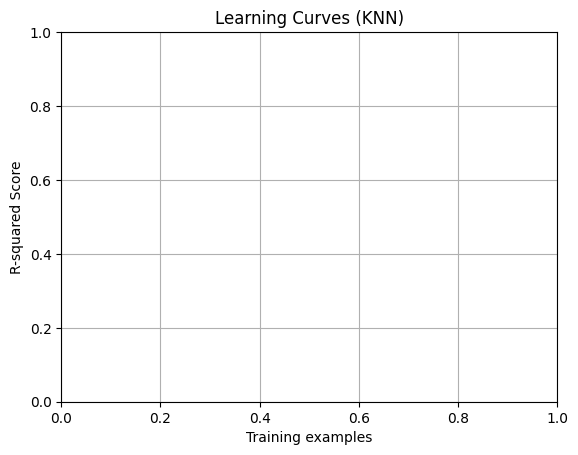

In [89]:
from sklearn.model_selection import learning_curve
knn_model = KNeighborsRegressor()

param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}

grid_search_knn = GridSearchCV(knn_model, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search_knn.fit(X_train_scaled, y_train)

best_params_knn = grid_search_knn.best_params_
print("Best hyperparameters for KNN:", best_params_knn)

best_knn_model = grid_search_knn.best_estimator_


y_train_pred_knn = best_knn_model.predict(X_train_scaled)


y_test_pred_knn = best_knn_model.predict(X_test_scaled)


r_squared_train_knn = r2_score(y_train, y_train_pred_knn)


r_squared_test_knn = r2_score(y_test, y_test_pred_knn)


print("R-squared on Training Data:", r_squared_train_knn)
print("R-squared on Test Data:", r_squared_test_knn)


train_sizes, train_scores, test_scores = learning_curve(best_knn_model, X_train_scaled, y_train, cv=5, scoring='r2', n_jobs=-1)


train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Learning Curves (KNN)")
plt.xlabel("Training examples")
plt.ylabel("R-squared Score")
plt.grid()

In [90]:
from sklearn.metrics import r2_score


best_knn_model = grid_search_knn.best_estimator_


y_train_pred_knn = best_knn_model.predict(X_train_scaled)


y_test_pred_knn = best_knn_model.predict(X_test_scaled)


r_squared_train_knn = r2_score(y_train, y_train_pred_knn)
r_squared_test_knn = r2_score(y_test, y_test_pred_knn)


print("R-squared on Training Data:", r_squared_train_knn)
print("R-squared on Test Data:", r_squared_test_knn)


if r_squared_train_knn > r_squared_test_knn:
    print("The model may be overfitting.")


R-squared on Training Data: 0.9998960198713917
R-squared on Test Data: 0.9752187362841976
The model may be overfitting.


In [91]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred_knn = best_knn_model.predict(X_test_scaled)

mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r_squared_knn = r2_score(y_test, y_pred_knn)

print("Evaluation Metrics for K-Nearest Neighbors (KNN) Regressor with Best Hyperparameters:")
print(f"Mean Absolute Error (MAE): {mae_knn:.4f}")
print(f"Mean Squared Error (MSE): {mse_knn:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_knn:.4f}")
print(f"R-squared: {r_squared_knn:.4f}")

Evaluation Metrics for K-Nearest Neighbors (KNN) Regressor with Best Hyperparameters:
Mean Absolute Error (MAE): 0.1040
Mean Squared Error (MSE): 0.0267
Root Mean Squared Error (RMSE): 0.1635
R-squared: 0.9752


In [92]:

gb_model = GradientBoostingRegressor()

param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

grid_search_gb = GridSearchCV(gb_model, param_grid, cv=5, scoring='r2')
grid_search_gb.fit(X_train, y_train)

best_params_gb = grid_search_gb.best_params_
print("Best hyperparameters for GradientBoostingRegressor:", best_params_gb)

best_gb_model = grid_search_gb.best_estimator_
y_pred_gb = best_gb_model.predict(X_test)
r_squared_gb = r2_score(y_test, y_pred_gb)
print("R-squared with best GradientBoostingRegressor:", r_squared_gb)


Best hyperparameters for GradientBoostingRegressor: {'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 150}
R-squared with best GradientBoostingRegressor: 0.9635943756639838


In [93]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred_gb = best_gb_model.predict(X_test)

mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
r_squared_gb = r2_score(y_test, y_pred_gb)

print("Evaluation Metrics for Gradient Boosting Regressor with Best Hyperparameters:")
print(f"Mean Absolute Error (MAE): {mae_gb:.4f}")
print(f"Mean Squared Error (MSE): {mse_gb:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_gb:.4f}")
print(f"R-squared: {r_squared_gb:.4f}")


Evaluation Metrics for Gradient Boosting Regressor with Best Hyperparameters:
Mean Absolute Error (MAE): 0.1269
Mean Squared Error (MSE): 0.0393
Root Mean Squared Error (RMSE): 0.1982
R-squared: 0.9636


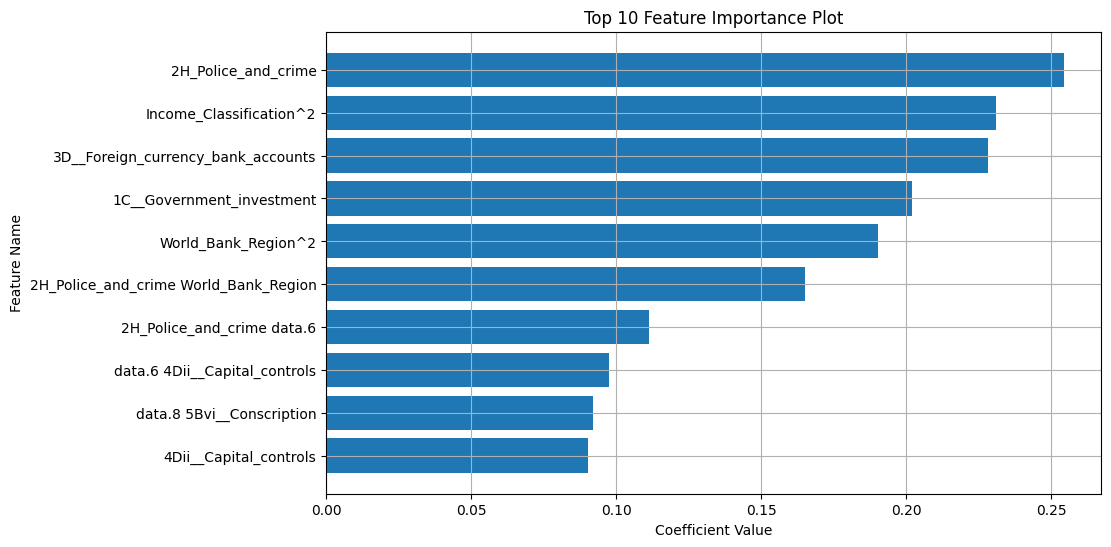

In [95]:

feature_names = poly.get_feature_names_out(input_features=X.columns)
coefficients = model.coef_[0]
sorted_indices = np.argsort(coefficients)
sorted_feature_names = [feature_names[i] for i in sorted_indices]
sorted_coefficients = coefficients[sorted_indices]

top_feature_names = sorted_feature_names[-10:]
top_coefficients = sorted_coefficients[-10:]

plt.figure(figsize=(10, 6))
plt.barh(top_feature_names, top_coefficients)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature Name')
plt.title('Top 10 Feature Importance Plot')
plt.grid(True)
plt.show()
